in ths file we will work with probability and statistics commonly used in Data Science.

In [6]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt



Random Variables and Distributions

We will start by using 30 random variables from 0-9 we will use the random library. We will then compute the mean and and variance.

In [4]:
sample = [ random.randint(0,9) for _ in range(30) ]
print(f"sample:{sample}")
print(f"mean:{np.mean(sample)}")
print(f"std:{np.std(sample)}")
print(f"variance:{np.var(sample)}")

sample:[4, 0, 1, 5, 8, 3, 3, 8, 9, 3, 8, 0, 4, 9, 5, 7, 8, 7, 7, 2, 8, 4, 0, 5, 4, 7, 0, 2, 2, 3]
mean:4.533333333333333
std:2.8836705005176224
variance:8.315555555555555


Real World Data

Mean and Variance are very important in the real world and so we will use baseball players from SOCR.

In [4]:
df = pd.read_csv("baseball_players.csv",names=['Name', 'Team', 'Role', 'Height', 'Weight', 'Age'])
df

,Name,Team,Role,Height,Weight,Age
0,Name,Team,Position,Height(inches),Weight(pounds),Age
1,Adam_Donachie,BAL,Catcher,74,180,22.99
2,Paul_Bako,BAL,Catcher,74,215,34.69
3,Ramon_Hernandez,BAL,Catcher,72,210,30.78
4,Kevin_Millar,BAL,First_Baseman,72,210,35.43
...,...,...,...,...,...,...
1030,Brad_Thompson,STL,Relief_Pitcher,73,190,25.08
1031,Tyler_Johnson,STL,Relief_Pitcher,74,180,25.73
1032,Chris_Narveson,STL,Relief_Pitcher,75,205,25.19
1033,Randy_Keisler,STL,Relief_Pitcher,75,190,31.01


we are using a library called pandas for data analysis.

lets compute for the average of age,height and weight.

In [8]:
df[['Age','Weight','Height']].mean()

TypeError: can only concatenate str (not "int") to str

In [9]:
print(df['Age'].unique())
print(df['Height'].unique())
print(df['Weight'].unique())


['Age' '22.99' '34.69' '30.78' '35.43' '35.71' '29.39' '30.77' '35.07'
 '30.19' '27.05' '23.88' '26.96' '23.29' '26.11' '27.55' '34.27' '30'
 '27.99' '22.38' '22.89' '25.76' '36.33' '31.17' '32.31' '31.03' '29.26'
 '29.47' '32.46' '35.67' '25.89' '26.55' '24.17' '26.69' '25.13' '27.9'
 '30.17' '31.36' '30.99' '32.24' '27.61' '28.2' '28.85' '24.21' '22.02'
 '24.97' '26.78' '32.51' '30.95' '33.09' '32.74' '30.69' '36.51' '26.03'
 '23.45' '24.94' '24.09' '35.23' '27.43' '30.6' '27.94' '29.99' '25.17'
 '24.13' '30.46' '25.96' '22.55' '26.29' '24.79' '31.74' '23.92' '25.33'
 '24.02' '23.7' '31.59' '29.95' '23.64' '32.33' '23.13' '26.6' '26.46'
 '25.75' '27.51' '25.11' '34.67' '31.06' '29.1' '28.66' '28.35' '33.77'
 '30.89' '37.74' '24.14' '25.71' '24.41' '24.32' '28.09' '33.31' '36.4'
 '37.36' '31.61' '25.14' '30.29' '36.37' '34.89' '23.79' '27.96' '23.54'
 '31.37' '31.29' '33.01' '25.1' '31.28' '34.75' '23.46' '25.37' '29.57'
 '27.33' '40.29' '40.58' '26.79' '32.55' '26.27' '29.07' '23.15'

In [10]:
#convert columns to to numeric
df['Age'] = pd.to_numeric(df['Age'],errors='coerce')
df['Height'] = pd.to_numeric(df['Height'],errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'],errors='coerce')

#now compute the mean
df[['Age','Height','Weight']].mean()


Age        28.736712
Height     73.697292
Weight    201.689255
dtype: float64

Now we focus on height and we can now compute the standard deviation and variance.

In [12]:
print(list(df['Height'])[:20])

[nan, 74.0, 74.0, 72.0, 72.0, 73.0, 69.0, 69.0, 71.0, 76.0, 71.0, 73.0, 73.0, 74.0, 74.0, 69.0, 70.0, 72.0, 73.0, 75.0]


In [13]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f'mean:{mean},\nVariance:{var},\nStandard Deviation:{std}')

mean:73.6972920696325,
Variance:5.316798081118074,
Standard Deviation:2.3058183105175645


we can also look at the median and the quartiles values and can be visualized using box plots.

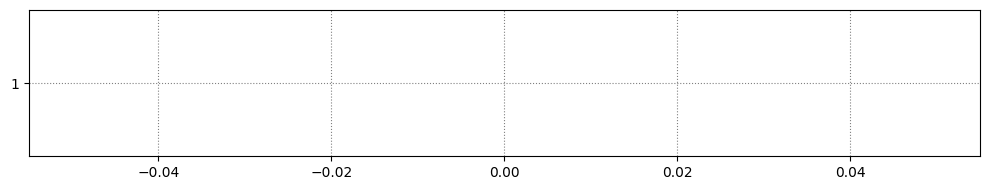

In [16]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

we can also use the boxplots as a subset of our datasets.

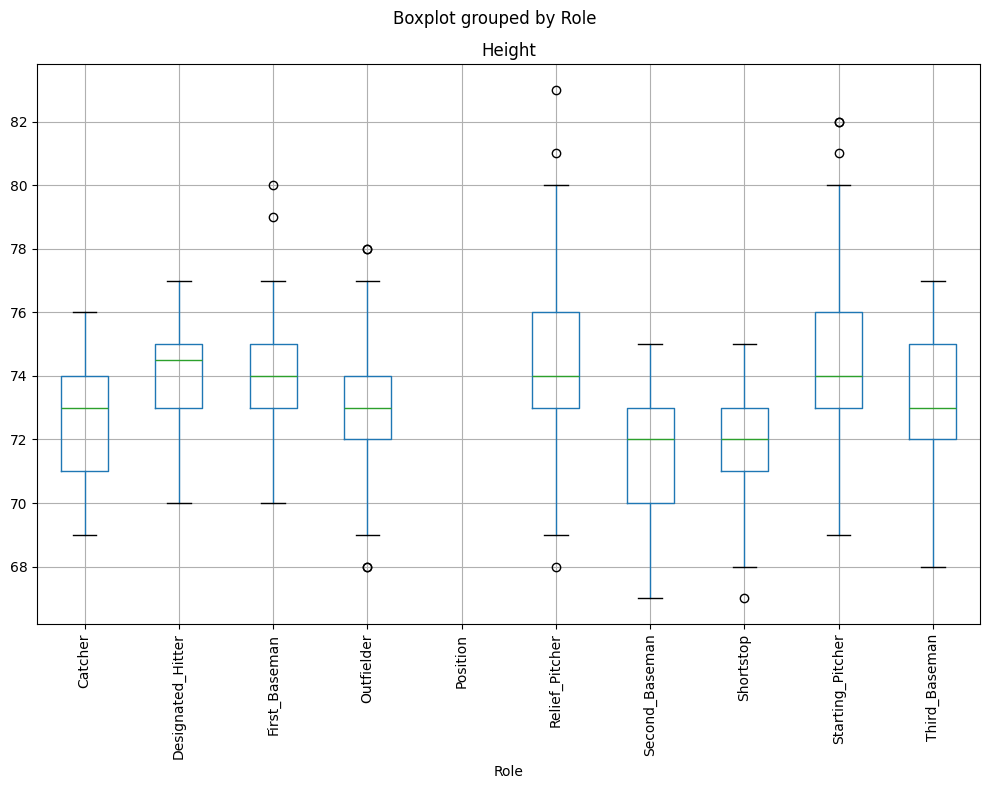

In [18]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


Note: This diagram suggests, that on average, the heights of first basemen are higher than heights of second basemen. Later we will learn how we can test this hypothesis more formally, and how to demonstrate that our data is statistically significant to show that.

Age, height and weight are all continuous random variables. What do you think their distribution is? A good way to find out is to plot the histogram of values:

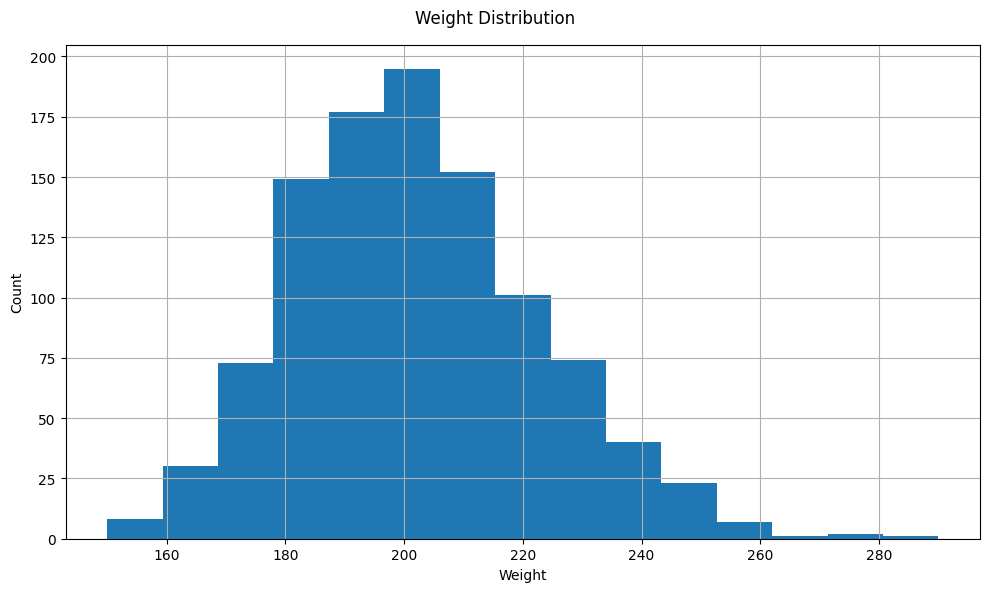

In [19]:
df['Weight'].hist(bins=15,figsize=(10,6))
plt.suptitle('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Normal Distribution
Let's create an artificial sample of weights that follows a normal distribution with the same mean and variance as our real data:

In [20]:
generated = np.random.normal(mean,std,1000)
generated[:20]

array([76.72980566, 71.336227  , 73.82113707, 74.32587881, 74.00614686,
       75.4063311 , 72.64070646, 72.55790432, 73.90674296, 71.57263764,
       75.18722739, 71.49189364, 72.72416349, 73.89843963, 75.66600275,
       73.096138  , 76.71672956, 78.51831286, 76.97201727, 73.38273808])

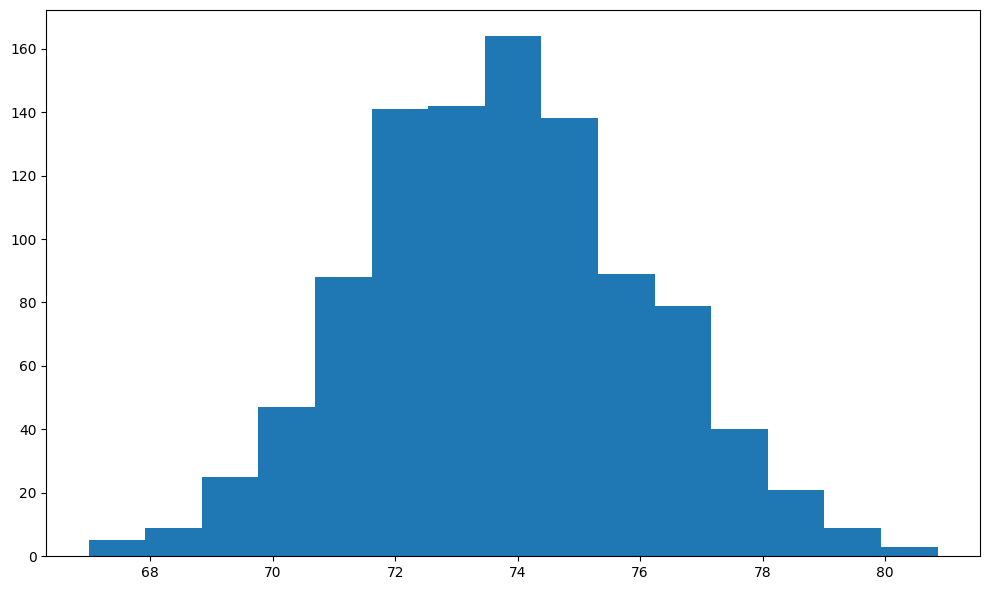

In [21]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

Since most values in real life are normally distributed, we should not use a uniform random number generator to generate sample data. Here is what happens if we try to generate weights with a uniform distribution (generated by np.random.rand):

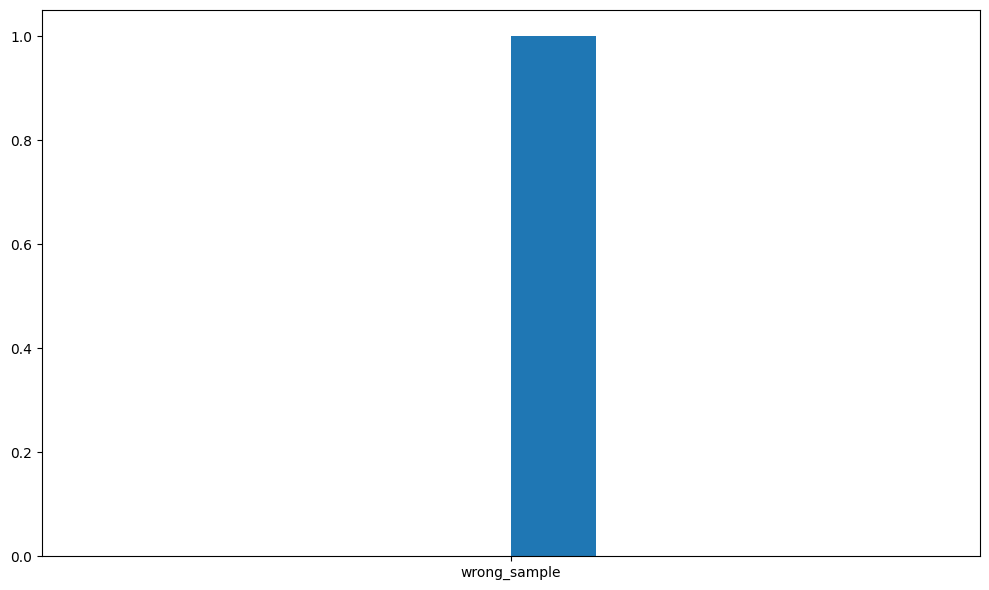

In [22]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist('wrong_sample')
plt.tight_layout()
plt.show()